In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
# Read in counts matrix
adata_matrix = sc.read_text("GSE182434_raw_count_matrix.txt")

# Read in cell annotation data
cell_annotations = pd.read_csv('GSE182434_cell_annotation.txt', delimiter='\t')

In [3]:
adata = adata_matrix.transpose()

In [4]:
adata.X.shape

(28416, 49632)

In [5]:
# Set the cell annotations data frame to our AnnData Observations Object
adata.obs = cell_annotations

In [6]:
adata.obs

,ID,Patient,Sample,CellType,TumorNormal,COO,Tissue
0,AAACCTGAGTTAAGTG_DLBCL002B,DLBCL002,DLBCL002B,B cells,Normal,ABC,DLBCL
1,AAACCTGCATGTAAGA_DLBCL002B,DLBCL002,DLBCL002B,B cells,Tumor,ABC,DLBCL
2,AAACCTGTCGCGCCAA_DLBCL002B,DLBCL002,DLBCL002B,B cells,Tumor,ABC,DLBCL
3,AAACGGGAGACTTTCG_DLBCL002B,DLBCL002,DLBCL002B,B cells,Tumor,ABC,DLBCL
4,AAACGGGCATGTTGAC_DLBCL002B,DLBCL002,DLBCL002B,B cells,Tumor,ABC,DLBCL
...,...,...,...,...,...,...,...
28411,TTTGTCACATGGGAAC_T2NB,T2,T2NB,TFH,Normal,NaN,Tonsil
28412,TTTGTCACATGGTCTA_T2NB,T2,T2NB,T cells CD4,Normal,NaN,Tonsil
28413,TTTGTCAGTAAGTTCC_T2NB,T2,T2NB,TFH,Normal,NaN,Tonsil
28414,TTTGTCAGTGACTCAT_T2NB,T2,T2NB,T cells CD4,Normal,NaN,Tonsil


In [7]:
adata.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC171558.2
BX004987.4
AC145212.4
AC145212.2


# Filtering out Low Quality Cells

In [8]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))

In [9]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo"], inplace=True, percent_top=[20], log1p=True
)

In [10]:
adata.obs

,ID,Patient,Sample,CellType,TumorNormal,COO,Tissue,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo
0,AAACCTGAGTTAAGTG_DLBCL002B,DLBCL002,DLBCL002B,B cells,Normal,ABC,DLBCL,1096,7.000334,2791.0,7.934514,23.217485,94.0,4.553877,3.367969,911.0,6.815640,32.640629
1,AAACCTGCATGTAAGA_DLBCL002B,DLBCL002,DLBCL002B,B cells,Tumor,ABC,DLBCL,3690,8.213653,18301.0,9.814766,20.080870,632.0,6.450470,3.453363,6347.0,8.755895,34.681164
2,AAACCTGTCGCGCCAA_DLBCL002B,DLBCL002,DLBCL002B,B cells,Tumor,ABC,DLBCL,5208,8.558143,40610.0,10.611794,21.383896,1090.0,6.994850,2.684068,15459.0,9.646011,38.066978
3,AAACGGGAGACTTTCG_DLBCL002B,DLBCL002,DLBCL002B,B cells,Tumor,ABC,DLBCL,2887,7.968320,11842.0,9.379492,22.605979,69.0,4.248495,0.582672,3870.0,8.261269,32.680290
4,AAACGGGCATGTTGAC_DLBCL002B,DLBCL002,DLBCL002B,B cells,Tumor,ABC,DLBCL,2791,7.934513,9407.0,9.149316,20.006378,302.0,5.713733,3.210375,2251.0,7.719574,23.928989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28411,TTTGTCACATGGGAAC_T2NB,T2,T2NB,TFH,Normal,NaN,Tonsil,1232,7.117206,3320.0,8.108021,23.975904,239.0,5.480639,7.198795,1161.0,7.057898,34.969879
28412,TTTGTCACATGGTCTA_T2NB,T2,T2NB,T cells CD4,Normal,NaN,Tonsil,1038,6.946014,2740.0,7.916078,26.751825,242.0,5.493062,8.832116,1094.0,6.998509,39.927010
28413,TTTGTCAGTAAGTTCC_T2NB,T2,T2NB,TFH,Normal,NaN,Tonsil,887,6.788972,1842.0,7.519150,26.710098,142.0,4.962845,7.709012,504.0,6.224558,27.361563
28414,TTTGTCAGTGACTCAT_T2NB,T2,T2NB,T cells CD4,Normal,NaN,Tonsil,721,6.582025,1735.0,7.459339,26.397695,216.0,5.379897,12.449568,645.0,6.470799,37.175793


In [11]:
sc.pp.filter_genes(adata, min_cells=10)

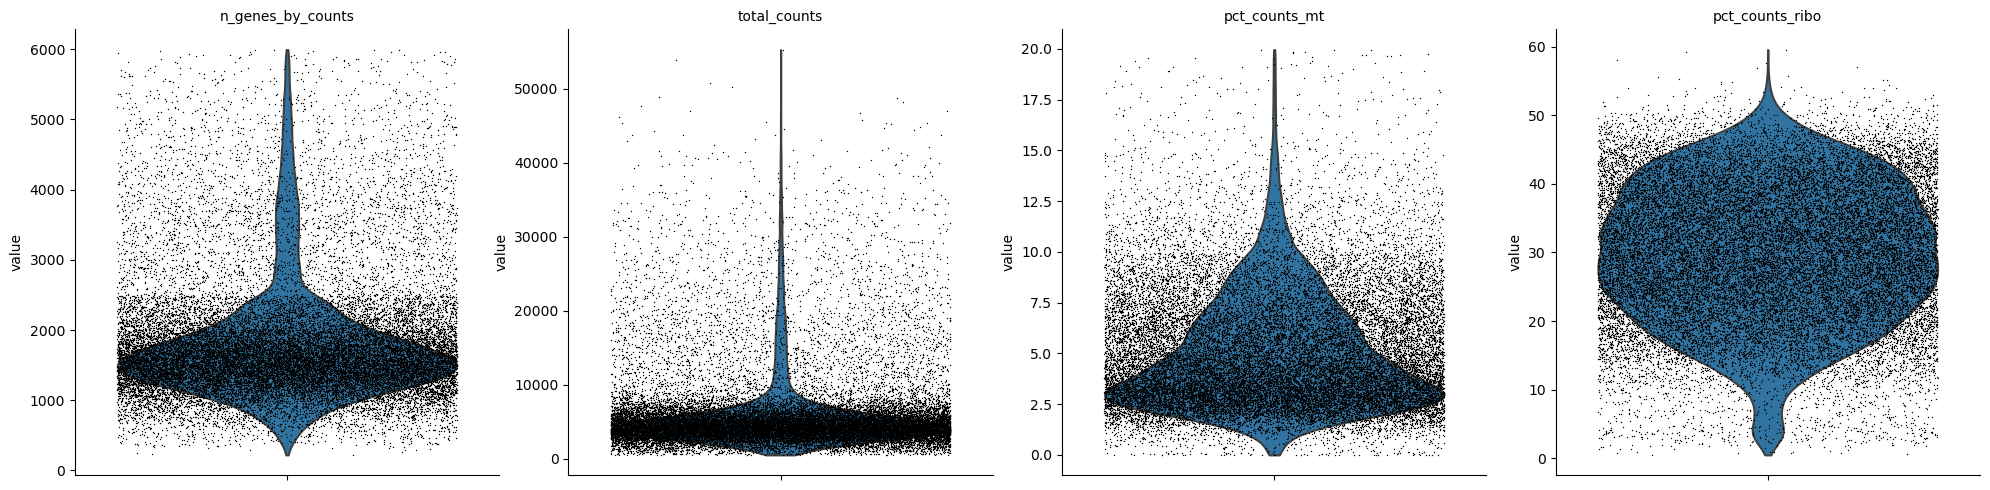

In [12]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [13]:
from scipy.stats import median_abs_deviation

def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        M > np.median(M) + nmads * median_abs_deviation(M)
    )
    return outlier

In [14]:
adata.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata, "pct_counts_mt", 3)
    | is_outlier(adata, "pct_counts_ribo", 5)
)
adata.obs.outlier.value_counts()

outlier
False    24969
True      3447
Name: count, dtype: int64

In [15]:
adata = adata[~adata.obs.outlier, :]

In [16]:
adata.X.shape

(24969, 21696)

# Normalization

In [17]:
adata.X.sum(axis = 1)

array([ 2791., 18299., 11838., ...,  2739.,  1842.,  1760.], dtype=float32)

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [19]:
adata.X.sum(axis = 1)

array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [20]:
sc.pp.log1p(adata)

In [21]:
adata.raw = adata

In [22]:
sc.pp.highly_variable_genes(adata)

In [23]:
adata = adata[:, adata.var.highly_variable]

In [24]:
adata.X.shape

(24969, 1529)

In [25]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

In [26]:
sc.pp.scale(adata, max_value=10)

# Visualization

In [27]:
sc.tl.pca(adata, svd_solver='arpack')

In [28]:
sc.pp.neighbors(adata, n_pcs = 30)

In [29]:
sc.tl.umap(adata)

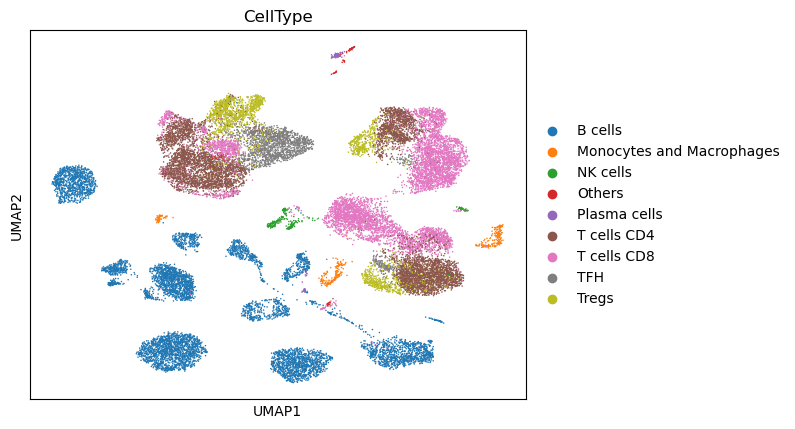

In [30]:
sc.pl.umap(adata, color=['CellType'])

### Visualizing the Unprocessed Data

In [32]:
adata_unprocessed = adata_matrix.transpose()
adata_unprocessed.obs = cell_annotations

In [33]:
sc.tl.pca(adata_unprocessed, svd_solver='arpack')

In [34]:
sc.pp.neighbors(adata_unprocessed, n_pcs = 30)

In [35]:
sc.tl.umap(adata_unprocessed)

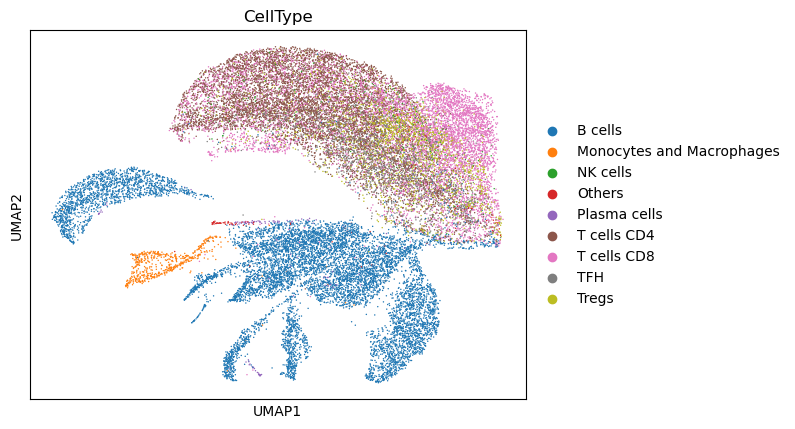

In [36]:
sc.pl.umap(adata_unprocessed, color=['CellType'])